In [1]:
from google.colab import drive
drive.mount('/content/drive')

rawdata_path = '/content/drive/MyDrive/my_project/my_project1/rawdata'
data_path = '/content/drive/MyDrive/my_project/my_project1/data'
final_result = '/content/drive/MyDrive/my_project/my_project1/result/reg'
final_img = '/content/drive/MyDrive/my_project/my_project1/result/img'
final_table = '/content/drive/MyDrive/my_project/my_project1/result/table'
# rawdata_path = 'rawdata/'
# data_path = 'data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# # 1. 나눔 폰트 다운
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns


import geopandas as gpd

import statsmodels.api as sm
import re
from io import StringIO

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [4]:
year_list = ['2022', '2023', '2024']

for year in year_list:
    globals()[f'temp_{year}'] = pd.read_csv(f'{data_path}/final/final_{year}.csv')

    globals()[f'temp_{year}'][f'solo_20s_{year}'] = globals()[f'temp_{year}'].apply(lambda x: (x[f'solo_20_{year}'] + x[f'solo_25_{year}']) / 2, axis = 1)
    globals()[f'temp_{year}'][f'solo_30s_{year}'] = globals()[f'temp_{year}'].apply(lambda x: (x[f'solo_30_{year}'] + x[f'solo_35_{year}']) / 2, axis = 1)

    globals()[f'temp_{year}'][f'solo_all_ratio'] = globals()[f'temp_{year}'].apply(lambda x: x[f'solo_all_{year}'] / x[f'total_all_{year}'] * 100, axis=1)
    globals()[f'temp_{year}'][f'solo_20s_ratio'] = globals()[f'temp_{year}'].apply(lambda x: x[f'solo_20s_{year}'] / x[f'solo_all_{year}'] * 100, axis=1)
    globals()[f'temp_{year}'][f'solo_30s_ratio'] = globals()[f'temp_{year}'].apply(lambda x: x[f'solo_30s_{year}'] / x[f'solo_all_{year}'] * 100, axis=1)
    globals()[f'temp_{year}'] = globals()[f'temp_{year}'].replace('-', '0')

In [5]:
depend_list = ['solo_all_ratio', 'solo_20s_ratio', 'solo_30s_ratio']
depend_name = ['all', '20', '30']

In [6]:
reg_col = ['ADM_CD'] + depend_list + ['네일숍', '미용실', '애완동물',
           '분식전문점', '한식음식점', '양식음식점', '일식음식점', '중식음식점', '치킨전문점',
           '커피-음료', '패스트푸드점', '제과점', '호프-간이주점',
            '대형마트', '쇼핑업체수', '편의점', '슈퍼마켓',
           '지가변동률', '지가',
           '사업체수', '종사자수',
           '대학교', '기타대학', '월평균소득' ]

drop_col = [ '면적', '월평균소득', '총상주인구', '20대상주인구', '총직장인구', '20대직장인구', '유통업체수',]

In [7]:
df_2022 = temp_2022.copy()
df_2022.head()

ADM_CD  total_all_2022  solo_all_2022  total_20_2022  solo_20_2022  \
0  11010530          7848.0         1854.0          582.0         183.0   
1  11010540          2384.0          831.0          156.0          78.0   
2  11010550          9116.0         1530.0         1147.0         201.0   
3  11010560         15369.0         1604.0         1269.0         132.0   
4  11030740         18531.0         5332.0         1138.0         439.0   

   total_25_2022  solo_25_2022  total_30_2022  solo_30_2022  total_35_2022  \
0          687.0         220.0          779.0         244.0          758.0   
1          172.0          90.0          193.0          90.0          211.0   
2          841.0         154.0          711.0         181.0          652.0   
3         1173.0         127.0         1172.0         144.0         1075.0   
4         1829.0         748.0         2393.0         897.0         2037.0   

   ...  총매출금액_커피-음료_2022  총매출금액_패스트푸드점_2022  총매출금액_편의점_2022  총매출금액_한식음식점_2022  \
0  ...      8.715381e+09        749006078.0    4.259033e+09      2.279076e+10   
1  ...      4.847156e+09          7462031.0    4.966037e+08      4.833707e+09   
2  ...      4.592954e+08        107221827.0    7.261664e+08      5.864678e+08   
3  ...      5.489234e+08                0.0    4.087258e+08      2.379329e+09   
4  ...      2.705864e+09        228290638.0    3.617802e+09      1.480354e+10   

   총매출금액_호프-간이주점_2022  solo_20s_2022  solo_30s_2022  solo_all_ratio  \
0        1.627539e+09          201.5          224.5       23.623853   
1        1.334099e+08           84.0           94.5       34.857383   
2        1.911793e+07          177.5          167.5       16.783677   
3        1.762930e+08          129.5          130.5       10.436593   
4        2.165285e+09          593.5          802.0       28.773407   

   solo_20s_ratio  solo_30s_ratio  
0       10.868393       12.108954  
1       10.108303       11.371841  
2       11.601307       10.947712  
3        8.073566        8.135910  
4       11.130908       15.041260  

[5 rows x 133 columns]

In [8]:
columns_2022 = [col.replace('_2022', '') for col in df_2022.columns]
columns_2023 = [col.replace('_2023', '') for col in columns_2022]
columns_2024 = [col.replace('_2024', '') for col in columns_2023]
df_2022.columns = columns_2024
df_2022.columns

Index(['ADM_CD', 'total_all', 'solo_all', 'total_20', 'solo_20', 'total_25',
       'solo_25', 'total_30', 'solo_30', 'total_35',
       ...
       '총매출금액_커피-음료', '총매출금액_패스트푸드점', '총매출금액_편의점', '총매출금액_한식음식점',
       '총매출금액_호프-간이주점', 'solo_20s', 'solo_30s', 'solo_all_ratio',
       'solo_20s_ratio', 'solo_30s_ratio'],
      dtype='object', length=133)

In [9]:
reg_2022 = df_2022[reg_col]
reg_2022

ADM_CD  solo_all_ratio  solo_20s_ratio  solo_30s_ratio   네일숍    미용실  \
0    11010530       23.623853       10.868393       12.108954  13.0   30.0   
1    11010540       34.857383       10.108303       11.371841   1.0    0.0   
2    11010550       16.783677       11.601307       10.947712   0.0   10.0   
3    11010560       10.436593        8.073566        8.135910   2.0   16.0   
4    11030740       28.773407       11.130908       15.041260  11.0   46.0   
..        ...             ...             ...             ...   ...    ...   
417  11010600       28.133635        8.928571       12.142857   0.0    8.0   
418  11010610       49.126157       12.002990        8.505232  11.0   35.0   
419  11220630       13.926386       11.276252       12.665590  53.0  227.0   
420  11090700       24.407020       12.764194        9.997928  52.0  309.0   
421  11090750       15.407721        5.535499        7.400722  53.0  260.0   

     애완동물  분식전문점   한식음식점  양식음식점  ...  쇼핑업체수   편의점  슈퍼마켓     지가변동률         지가  \
0    10.0  127.0   413.0  183.0  ...      0  11.0   0.0  4.858500  96.517917   
1     0.0   17.0    73.0   85.0  ...      0   2.0   0.0  4.673571  96.461429   
2     6.0   14.0    41.0   37.0  ...      0   3.0   0.0  5.295000  96.764000   
3     3.0   15.0    56.0   19.0  ...      0   3.0   0.0  5.151000  96.442000   
4    14.0   27.0   197.0  210.0  ...      0  11.0   3.0  6.127000  95.366000   
..    ...    ...     ...    ...  ...    ...   ...   ...       ...        ...   
417   1.0   21.0    67.0   44.0  ...      0   3.0   0.0  4.457000  96.575000   
418  11.0  240.0  1173.0  316.0  ...      7  31.0   1.0  4.757000  96.444172   
419  59.0  103.0   525.0  105.0  ...      1  65.0   1.0  6.174000  95.269000   
420  61.0  112.0   654.0   30.0  ...      0  51.0   0.0  4.930000  97.841000   
421  50.0   99.0   662.0   33.0  ...      1  50.0   1.0  3.529000  98.466000   

      사업체수    종사자수  대학교  기타대학      월평균소득  
0     4994   56046  0.0   0.0  5007768.0  
1      970    5118  0.0   0.0  3442534.0  
2      908    4140  1.0   0.0  3647449.0  
3     1286    4294  0.0   0.0  4504006.0  
4     3213   20440  0.0   0.0  4381088.0  
..     ...     ...  ...   ...        ...  
417    977   15449  0.0   0.0  3479766.0  
418  17095  106826  1.0   0.0  3245251.0  
419   2720   16795  0.0   0.0  3864301.0  
420   2297    7190  0.0   1.0  2318870.0  
421   2228    6476  0.0   0.0  2359990.0  

[422 rows x 28 columns]

In [10]:
df_2023 = temp_2023.copy()
df_2023.head()

ADM_CD  total_all_2023  solo_all_2023  total_20_2023  solo_20_2023  \
0  11010530          7845.0         1869.0          583.0         172.0   
1  11010540          2370.0          800.0          143.0          68.0   
2  11010550          9116.0         1549.0         1147.0         213.0   
3  11010560         15369.0         1617.0         1269.0         136.0   
4  11030740         18463.0         5314.0         1138.0         442.0   

   total_25_2023  solo_25_2023  total_30_2023  solo_30_2023  total_35_2023  \
0          686.0         241.0          778.0         222.0          757.0   
1          172.0          85.0          193.0          92.0          211.0   
2          841.0         154.0          711.0         187.0          652.0   
3         1173.0         123.0         1172.0         143.0         1075.0   
4         1823.0         743.0         2384.0         881.0         2035.0   

   ...  총매출금액_커피-음료_2023  총매출금액_패스트푸드점_2023  총매출금액_편의점_2023  총매출금액_한식음식점_2023  \
0  ...      1.187346e+10        902523398.0    5.084405e+09      3.660644e+10   
1  ...      6.900190e+09        111870248.0    5.324073e+08      7.375948e+09   
2  ...      4.776125e+08        189999970.0    8.978345e+08      7.587584e+08   
3  ...      9.633955e+08        284394280.0    3.962739e+08      2.456528e+09   
4  ...      4.049663e+09        415945610.0    4.542987e+09      2.130260e+10   

   총매출금액_호프-간이주점_2023  solo_20s_2023  solo_30s_2023  solo_all_ratio  \
0        3.245160e+09          206.5          226.0       23.824092   
1        2.476535e+08           76.5           91.5       33.755274   
2        2.295424e+07          183.5          169.5       16.992102   
3        2.872706e+08          129.5          132.0       10.521179   
4        3.918752e+09          592.5          792.0       28.781888   

   solo_20s_ratio  solo_30s_ratio  
0       11.048689       12.092028  
1        9.562500       11.437500  
2       11.846352       10.942544  
3        8.008658        8.163265  
4       11.149793       14.904027  

[5 rows x 133 columns]

In [11]:
columns_2022 = [col.replace('_2022', '') for col in df_2023.columns]
columns_2023 = [col.replace('_2023', '') for col in columns_2022]
columns_2024 = [col.replace('_2024', '') for col in columns_2023]
df_2023.columns = columns_2024
df_2023.columns

Index(['ADM_CD', 'total_all', 'solo_all', 'total_20', 'solo_20', 'total_25',
       'solo_25', 'total_30', 'solo_30', 'total_35',
       ...
       '총매출금액_커피-음료', '총매출금액_패스트푸드점', '총매출금액_편의점', '총매출금액_한식음식점',
       '총매출금액_호프-간이주점', 'solo_20s', 'solo_30s', 'solo_all_ratio',
       'solo_20s_ratio', 'solo_30s_ratio'],
      dtype='object', length=133)

In [12]:
reg_2023 = df_2023[reg_col]
reg_2023

ADM_CD  solo_all_ratio  solo_20s_ratio  solo_30s_ratio   네일숍    미용실  \
0    11010530       23.824092       11.048689       12.092028  13.0   32.0   
1    11010540       33.755274        9.562500       11.437500   2.0    0.0   
2    11010550       16.992102       11.846352       10.942544   0.0   10.0   
3    11010560       10.521179        8.008658        8.163265   2.0   16.0   
4    11030740       28.781888       11.149793       14.904027  12.0   46.0   
..        ...             ...             ...             ...   ...    ...   
417  11010600       28.862095        9.442994       12.358573   0.0    8.0   
418  11010610       51.245969       12.514302        8.195080  10.0   34.0   
419  11220630       14.020878       11.360719       12.885109  55.0  234.0   
420  11090700       23.520569       13.645079       10.161909  55.0  308.0   
421  11090750       15.860125        5.658172        7.516951  56.0  272.0   

     애완동물  분식전문점   한식음식점  양식음식점  ...  쇼핑업체수   편의점  슈퍼마켓      지가변동률         지가  \
0     8.0  124.0   414.0  182.0  ...      0  11.0   0.0   7.902167  98.973167   
1     0.0   17.0    73.0   85.0  ...      0   1.0   0.0   7.840571  99.057857   
2     7.0   14.0    38.0   37.0  ...      0   4.0   0.0   8.004000  98.822000   
3     3.0   14.0    55.0   18.0  ...      0   3.0   0.0   8.009000  98.655000   
4    12.0   26.0   202.0  217.0  ...      0  11.0   3.0  10.155000  98.676000   
..    ...    ...     ...    ...  ...    ...   ...   ...        ...        ...   
417   1.0   20.0    67.0   44.0  ...      0   4.0   0.0   7.389000  98.986000   
418  13.0  238.0  1193.0  316.0  ...      7  34.0   1.0   7.914103  99.068069   
419  63.0   93.0   512.0  118.0  ...      1  69.0   1.0  10.086000  98.672000   
420  69.0  107.0   631.0   26.0  ...      0  51.0   0.0   7.019000  99.601000   
421  51.0   92.0   640.0   36.0  ...      1  51.0   1.0   4.929000  99.519000   

      사업체수    종사자수  대학교  기타대학      월평균소득  
0     4994   56046  0.0   0.0  5007768.0  
1      970    5118  0.0   0.0  3442534.0  
2      908    4140  1.0   0.0  3647449.0  
3     1286    4294  0.0   0.0  4504006.0  
4     3213   20440  0.0   0.0  4381088.0  
..     ...     ...  ...   ...        ...  
417    977   15449  0.0   0.0  3479766.0  
418  17095  106826  1.0   0.0  3245251.0  
419   2720   16795  0.0   0.0  3864301.0  
420   2297    7190  0.0   1.0  2318870.0  
421   2228    6476  0.0   0.0  2359990.0  

[422 rows x 28 columns]

In [13]:
df_2024 = temp_2024.copy()
df_2024.head()

ADM_CD  total_all_2024  solo_all_2024  total_20_2024  solo_20_2024  \
0  11010530          8934.0         2200.0          569.0         182.0   
1  11010540          2579.0          911.0          311.0         152.0   
2  11010550          9226.0         1582.0         1119.0         204.0   
3  11010560         15667.0         1646.0         1238.0         131.0   
4  11030740         19241.0         5509.0         1111.0         439.0   

   total_25_2024  solo_25_2024  total_30_2024  solo_30_2024  total_35_2024  \
0          705.0         252.0          791.0         262.0          749.0   
1          176.0          88.0          186.0          87.0          205.0   
2          865.0         161.0          687.0         177.0          637.0   
3         1207.0         128.0         1133.0         137.0         1051.0   
4         1882.0         760.0         2315.0         871.0         1991.0   

   ...  총매출금액_커피-음료_2023  총매출금액_패스트푸드점_2023  총매출금액_편의점_2023  총매출금액_한식음식점_2023  \
0  ...      1.187346e+10        902523398.0    5.084405e+09      3.660644e+10   
1  ...      6.900190e+09        111870248.0    5.324073e+08      7.375948e+09   
2  ...      4.776125e+08        189999970.0    8.978345e+08      7.587584e+08   
3  ...      9.633955e+08        284394280.0    3.962739e+08      2.456528e+09   
4  ...      4.049663e+09        415945610.0    4.542987e+09      2.130260e+10   

   총매출금액_호프-간이주점_2023  solo_20s_2024  solo_30s_2024  solo_all_ratio  \
0        3.245160e+09          217.0          242.5       24.625028   
1        2.476535e+08          120.0           88.0       35.323769   
2        2.295424e+07          182.5          163.5       17.147193   
3        2.872706e+08          129.5          125.0       10.506159   
4        3.918752e+09          599.5          782.5       28.631568   

   solo_20s_ratio  solo_30s_ratio  
0        9.863636       11.022727  
1       13.172338        9.659715  
2       11.536030       10.335019  
3        7.867558        7.594168  
4       10.882193       14.204030  

[5 rows x 133 columns]

In [14]:
columns_2022 = [col.replace('_2022', '') for col in df_2024.columns]
columns_2023 = [col.replace('_2023', '') for col in columns_2022]
columns_2024 = [col.replace('_2024', '') for col in columns_2023]
df_2024.columns = columns_2024
df_2024.columns

Index(['ADM_CD', 'total_all', 'solo_all', 'total_20', 'solo_20', 'total_25',
       'solo_25', 'total_30', 'solo_30', 'total_35',
       ...
       '총매출금액_커피-음료', '총매출금액_패스트푸드점', '총매출금액_편의점', '총매출금액_한식음식점',
       '총매출금액_호프-간이주점', 'solo_20s', 'solo_30s', 'solo_all_ratio',
       'solo_20s_ratio', 'solo_30s_ratio'],
      dtype='object', length=133)

In [15]:
reg_2024 = df_2024[reg_col]
reg_2024

ADM_CD  solo_all_ratio  solo_20s_ratio  solo_30s_ratio   네일숍    미용실  \
0    11010530       24.625028        9.863636       11.022727  14.0   35.0   
1    11010540       35.323769       13.172338        9.659715   1.0    0.0   
2    11010550       17.147193       11.536030       10.335019   0.0   10.0   
3    11010560       10.506159        7.867558        7.594168   3.0   15.0   
4    11030740       28.631568       10.882193       14.204030  14.0   48.0   
..        ...             ...             ...             ...   ...    ...   
417  11010600       29.180084        8.870968       12.011885   0.0    8.0   
418  11010610       48.905192       11.020078        9.381491  12.0   32.0   
419  11220630       13.962063       10.738148       12.281260  61.0  230.0   
420  11090700       25.509848       12.617279        9.470289  62.0  304.0   
421  11090750       16.407668        5.266652        7.014826  53.0  274.0   

     애완동물  분식전문점   한식음식점  양식음식점  ...  쇼핑업체수   편의점  슈퍼마켓      지가변동률  \
0    10.0  122.0   407.0  187.0  ...      0  12.0   0.0   8.764667   
1     1.0   17.0    76.0   85.0  ...      0   1.0   0.0   8.613000   
2     8.0   13.0    36.0   38.0  ...      0   4.0   0.0   9.032000   
3     4.0   13.0    53.0   20.0  ...      0   4.0   0.0   9.204000   
4    13.0   24.0   199.0  236.0  ...      0  11.0   3.0  11.399000   
..    ...    ...     ...    ...  ...    ...   ...   ...        ...   
417   1.0   19.0    67.0   43.0  ...      0   4.0   0.0   8.215000   
418  20.0  235.0  1219.0  320.0  ...      7  29.0   1.0   8.712793   
419  61.0   85.0   524.0  118.0  ...      1  70.0   1.0  11.430000   
420  73.0   93.0   601.0   23.0  ...      0  58.0   0.0   7.376000   
421  53.0   86.0   635.0   38.0  ...      1  56.0   1.0   5.245000   

             지가   사업체수    종사자수  대학교  기타대학      월평균소득  
0    100.182750   4994   56046  0.0   0.0  5007768.0  
1    100.133714    970    5118  0.0   0.0  3442534.0  
2    100.209000    908    4140  1.0   0.0  3647449.0  
3    100.254000   1286    4294  0.0   0.0  4504006.0  
4    100.192000   3213   20440  0.0   0.0  4381088.0  
..          ...    ...     ...  ...   ...        ...  
417  100.184000    977   15449  0.0   0.0  3479766.0  
418  100.158517  17095  106826  1.0   0.0  3245251.0  
419  100.170000   2720   16795  0.0   0.0  3864301.0  
420  100.144000   2297    7190  0.0   1.0  2318870.0  
421  100.119000   2228    6476  0.0   0.0  2359990.0  

[422 rows x 28 columns]

# 지도 그리기 준비

In [16]:
dong_shp = gpd.read_file('/content/drive/MyDrive/new_project1/data/seoul_shp/dong/bnd_dong_11_2023_2023_2Q.shp')
dong_shp.head()

BASE_DATE ADM_NM    ADM_CD  \
0  20230701    사직동  11010530   
1  20230701    삼청동  11010540   
2  20230701    부암동  11010550   
3  20230701    평창동  11010560   
4  20230701    한남동  11030740   

                                            geometry  
0  POLYGON ((953553.932 1953335.741, 953555.211 1...  
1  POLYGON ((954025.242 1953916.389, 954026.972 1...  
2  POLYGON ((952490.380 1956548.821, 952497.594 1...  
3  POLYGON ((953683.828 1959209.871, 953665.283 1...  
4  POLYGON ((956238.296 1950166.610, 956237.942 1...

In [17]:
df_2022['ADM_CD'] = df_2022['ADM_CD'].astype('int')
df_2023['ADM_CD'] = df_2023['ADM_CD'].astype('int')
df_2024['ADM_CD'] = df_2024['ADM_CD'].astype('int')

dong_shp['ADM_CD'] = dong_shp['ADM_CD'].astype('int')

In [18]:
map_base_2022 = dong_shp.merge(df_2022,
                          how = 'left',
                          on = 'ADM_CD')

In [19]:
map_base_2023 = dong_shp.merge(df_2023,
                          how = 'left',
                          on = 'ADM_CD')

In [20]:
map_base_2024 = dong_shp.merge(df_2024,
                          how = 'left',
                          on = 'ADM_CD')

In [21]:
map_base_2022.head()

BASE_DATE ADM_NM    ADM_CD  \
0  20230701    사직동  11010530   
1  20230701    삼청동  11010540   
2  20230701    부암동  11010550   
3  20230701    평창동  11010560   
4  20230701    한남동  11030740   

                                            geometry  total_all  solo_all  \
0  POLYGON ((953553.932 1953335.741, 953555.211 1...     7848.0    1854.0   
1  POLYGON ((954025.242 1953916.389, 954026.972 1...     2384.0     831.0   
2  POLYGON ((952490.380 1956548.821, 952497.594 1...     9116.0    1530.0   
3  POLYGON ((953683.828 1959209.871, 953665.283 1...    15369.0    1604.0   
4  POLYGON ((956238.296 1950166.610, 956237.942 1...    18531.0    5332.0   

   total_20  solo_20  total_25  solo_25  ...   총매출금액_커피-음료  총매출금액_패스트푸드점  \
0     582.0    183.0     687.0    220.0  ...  8.715381e+09   749006078.0   
1     156.0     78.0     172.0     90.0  ...  4.847156e+09     7462031.0   
2    1147.0    201.0     841.0    154.0  ...  4.592954e+08   107221827.0   
3    1269.0    132.0    1173.0    127.0  ...  5.489234e+08           0.0   
4    1138.0    439.0    1829.0    748.0  ...  2.705864e+09   228290638.0   

      총매출금액_편의점   총매출금액_한식음식점  총매출금액_호프-간이주점  solo_20s  solo_30s  \
0  4.259033e+09  2.279076e+10   1.627539e+09     201.5     224.5   
1  4.966037e+08  4.833707e+09   1.334099e+08      84.0      94.5   
2  7.261664e+08  5.864678e+08   1.911793e+07     177.5     167.5   
3  4.087258e+08  2.379329e+09   1.762930e+08     129.5     130.5   
4  3.617802e+09  1.480354e+10   2.165285e+09     593.5     802.0   

   solo_all_ratio  solo_20s_ratio  solo_30s_ratio  
0       23.623853       10.868393       12.108954  
1       34.857383       10.108303       11.371841  
2       16.783677       11.601307       10.947712  
3       10.436593        8.073566        8.135910  
4       28.773407       11.130908       15.041260  

[5 rows x 136 columns]

# 인구분포 지도

In [22]:
cnt_list = ['solo_all', 'solo_20', 'solo_30']
ratio_list = ['solo_all_ratio', 'solo_20s_ratio', 'solo_30s_ratio']
ratio_colname = ['전체 1인가구', '20대 1인 가구', '30대 1인 가구']
cmap_list = ['Oranges', 'Blues', 'Greens']
four_color = ['Oranges', 'Blues', 'Greens', 'Greys']
color_list = ['Orange', 'Blue', 'Green']
cmap_year_list = ['BuGn','Greens', 'YlGn']

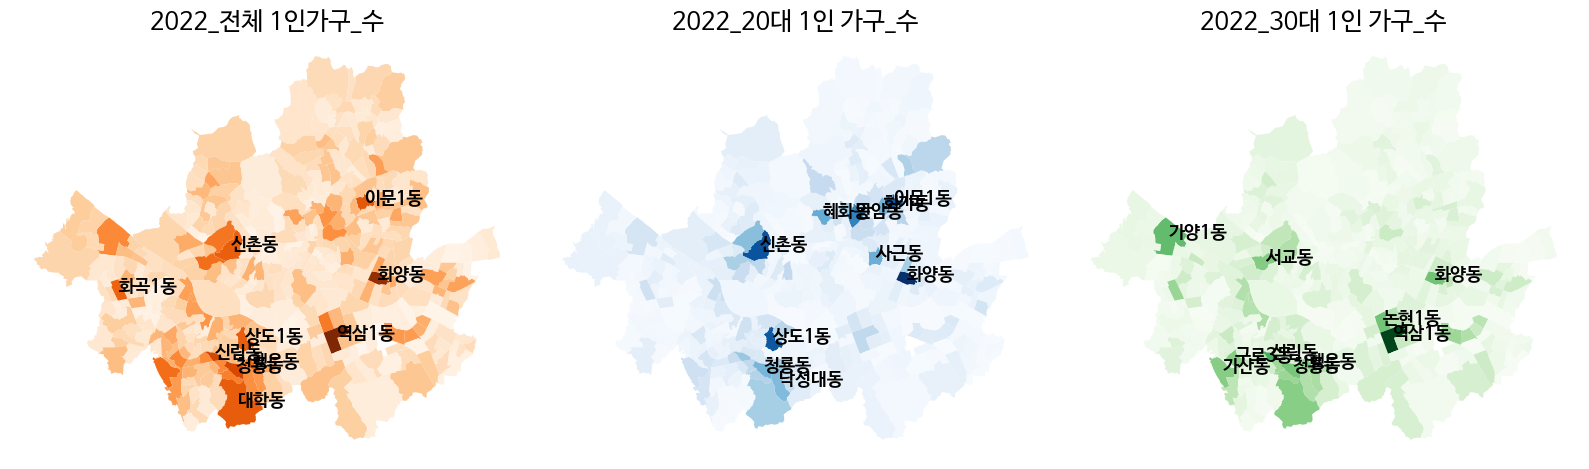

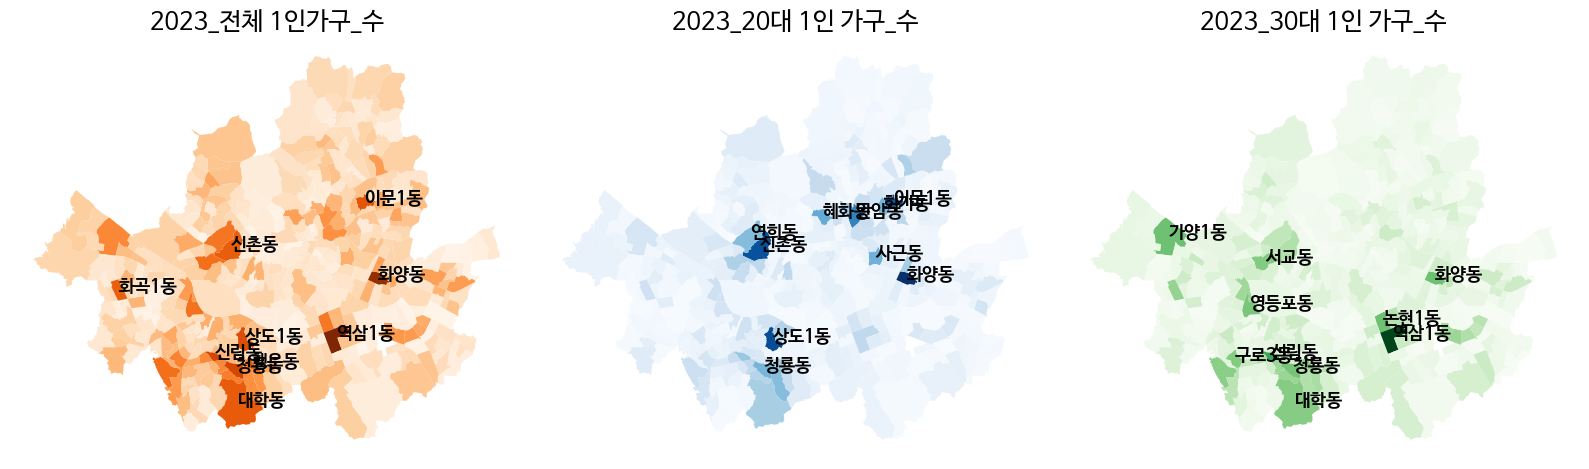

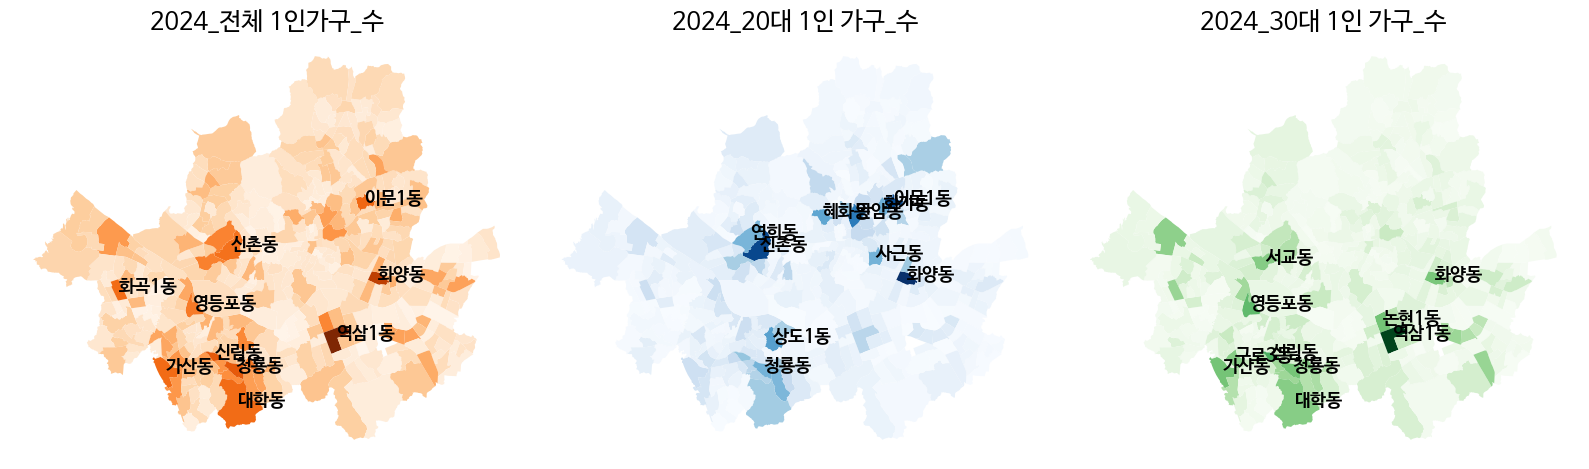

In [23]:
# 1인가구 수 그래프 그리기
# 년도별 / 각 연령대별

for year in year_list:
    map_base = globals()[f'map_base_{year}']

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

    for i, cnt in enumerate(cnt_list):
    # 그래프 그리기
        map_base.plot(column=cnt, ax=axes[i], cmap=cmap_list[i])
        axes[i].set_title(f'{year}_{ratio_colname[i]}_수', fontsize=18)
        axes[i].axis('off')

        # 상위 10개 지역 표시
        top_10 = map_base.nlargest(10, cnt)
        for idx in range(len(top_10)):
            lat = top_10.geometry.centroid.x.iloc[idx]
            long = top_10.geometry.centroid.y.iloc[idx]
            axes[i].text(lat, long, top_10["ADM_NM"].iloc[idx], fontsize=13, color='black', fontweight='bold')

    plt.tight_layout()

    # 이미지 저장
    plt.savefig(f'{final_img}/{year}년_1인 가구 수.png', format='png')
plt.show()


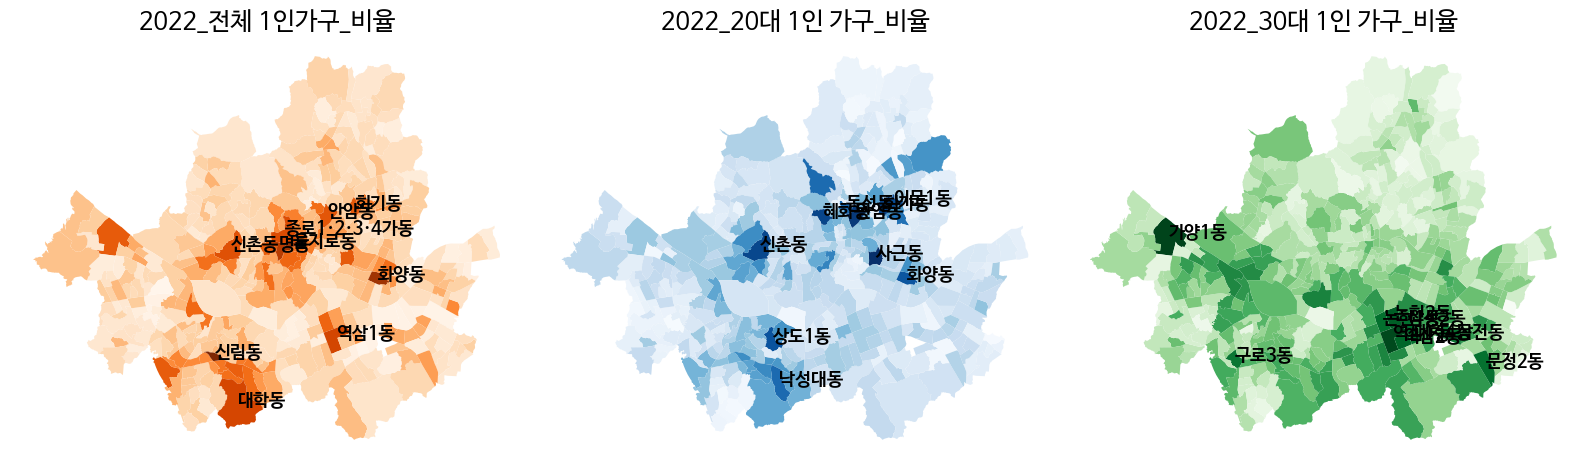

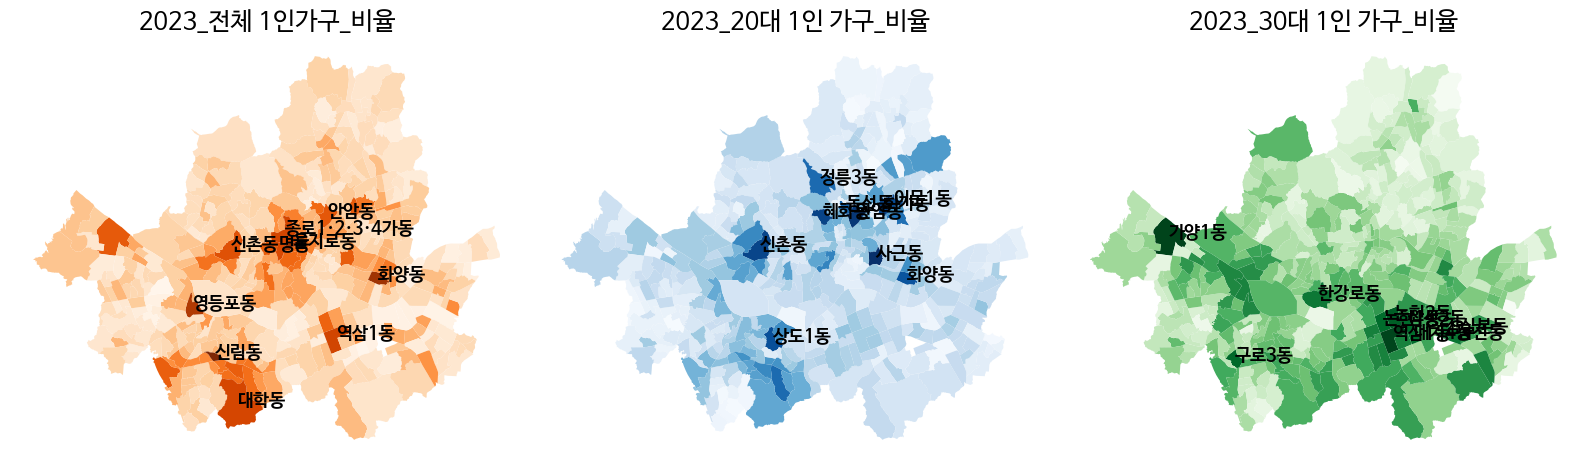

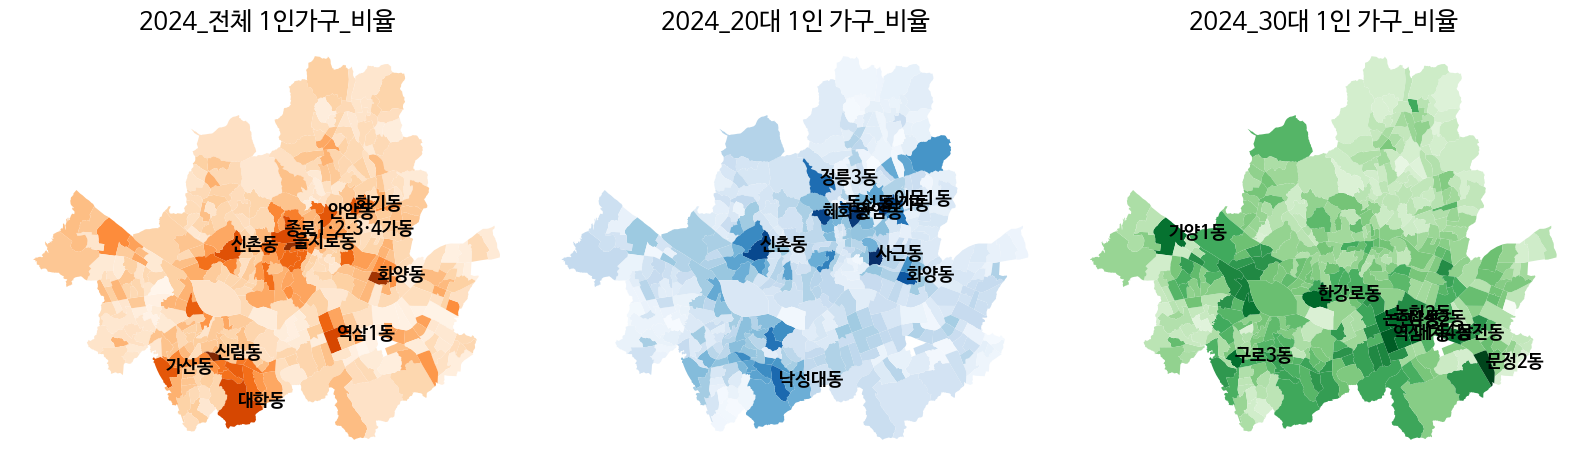

In [24]:
# 1인가구 비율 그래프 그리기
# 년도별 / 각 연령대별

for year in year_list:
    map_base = globals()[f'map_base_{year}']

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

    for i, ratio in enumerate(ratio_list):
    # 그래프 그리기
        map_base.plot(column=ratio, ax=axes[i], cmap=cmap_list[i])
        axes[i].set_title(f'{year}_{ratio_colname[i]}_비율', fontsize=18)
        axes[i].axis('off')

        # 상위 10개 지역 표시
        top_10 = map_base.nlargest(10, ratio)
        for idx in range(len(top_10)):
            lat = top_10.geometry.centroid.x.iloc[idx]
            long = top_10.geometry.centroid.y.iloc[idx]
            axes[i].text(lat, long, top_10["ADM_NM"].iloc[idx], fontsize=13, color='black', fontweight='bold')

    plt.tight_layout()

    # 이미지 저장
    plt.savefig(f'{final_img}/{year}년_1인 가구 비율.png', format='png')
plt.show()

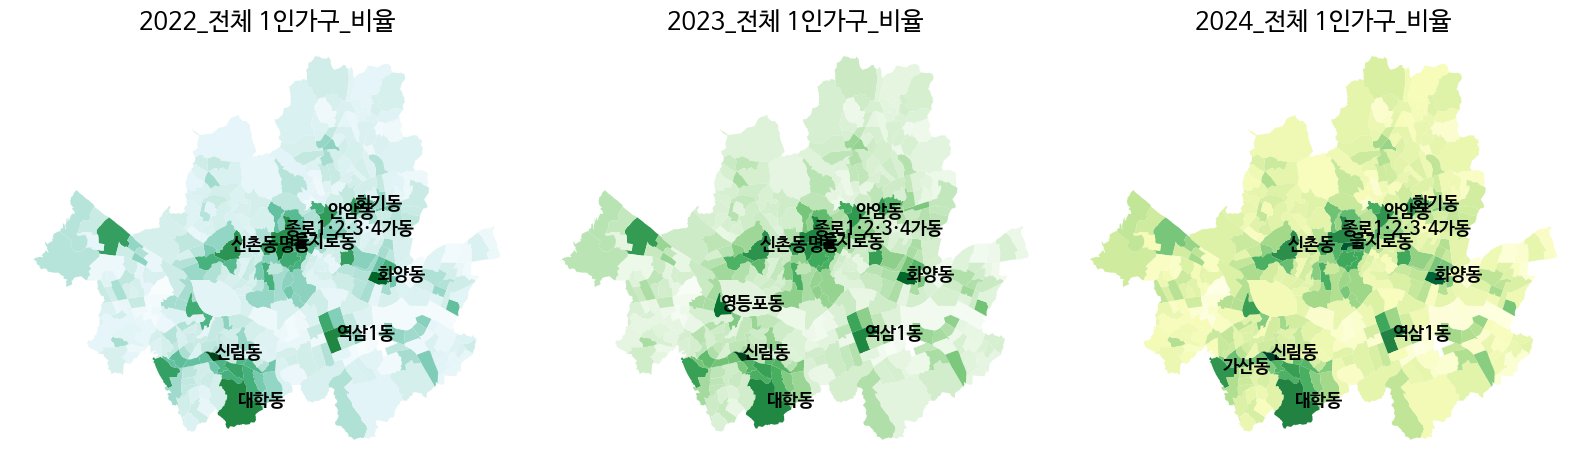

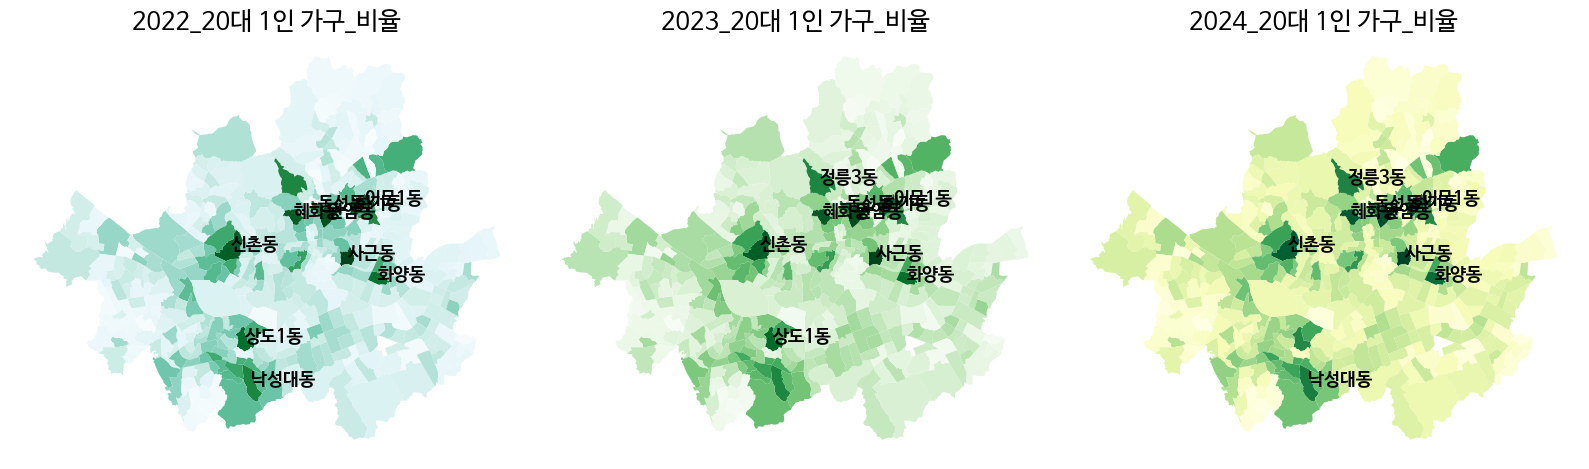

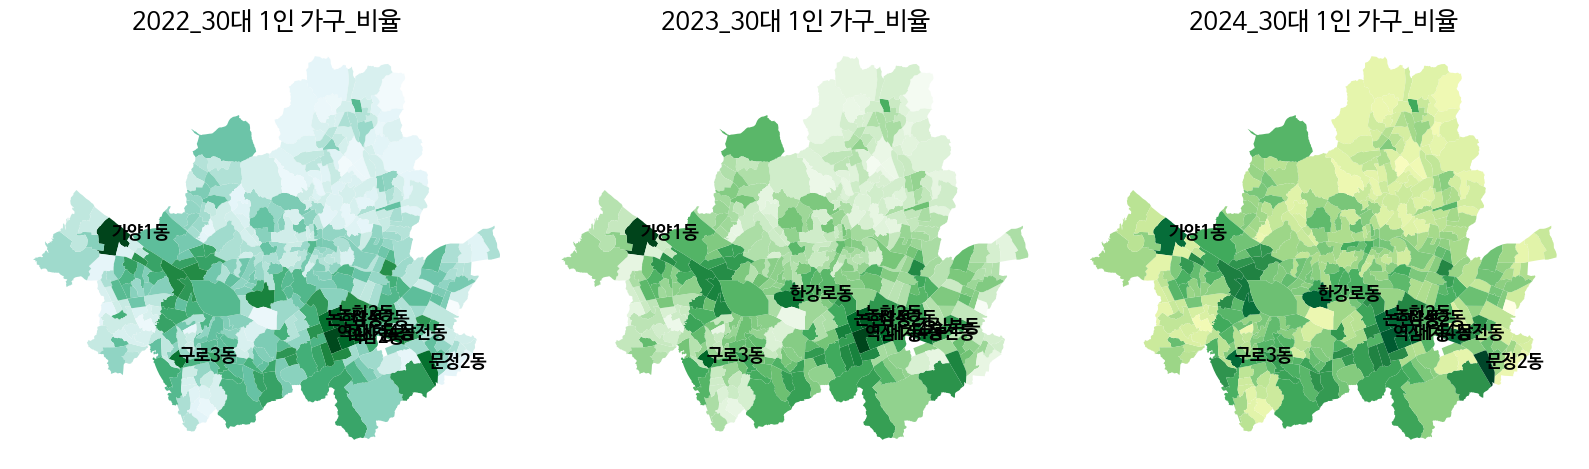

In [25]:
# 1인가구 비율 그래프 그리기
# 각 연령대별 / 년도별

for i_ratio, ratio in enumerate(ratio_list):

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

    for i_year, year in enumerate(year_list):
        map_base = globals()[f'map_base_{year}']

    # 그래프 그리기
        map_base.plot(column=ratio, ax=axes[i_year], cmap=cmap_year_list[i_year])
        axes[i_year].set_title(f'{year}_{ratio_colname[i_ratio]}_비율', fontsize=18)
        axes[i_year].axis('off')

        # 상위 10개 지역 표시
        top_10 = map_base.nlargest(10, ratio)
        for idx in range(len(top_10)):
            lat = top_10.geometry.centroid.x.iloc[idx]
            long = top_10.geometry.centroid.y.iloc[idx]
            axes[i_year].text(lat, long, top_10["ADM_NM"].iloc[idx], fontsize=13, color='black', fontweight='bold')

    plt.tight_layout()

    # 이미지 저장
    plt.savefig(f'{final_img}/{ratio_colname[i_ratio]}_년도별_1인 가구 비율.png', format='png')
plt.show()

# 지역특성 그래프

In [26]:
region_feature = [ '지가변동률', '사업체수', '대학교',  '월평균소득']

In [27]:
drop_col

['면적', '월평균소득', '총상주인구', '20대상주인구', '총직장인구', '20대직장인구', '유통업체수']

In [28]:
reg_col

['ADM_CD',
 'solo_all_ratio',
 'solo_20s_ratio',
 'solo_30s_ratio',
 '네일숍',
 '미용실',
 '애완동물',
 '분식전문점',
 '한식음식점',
 '양식음식점',
 '일식음식점',
 '중식음식점',
 '치킨전문점',
 '커피-음료',
 '패스트푸드점',
 '제과점',
 '호프-간이주점',
 '대형마트',
 '쇼핑업체수',
 '편의점',
 '슈퍼마켓',
 '지가변동률',
 '지가',
 '사업체수',
 '종사자수',
 '대학교',
 '기타대학',
 '월평균소득']

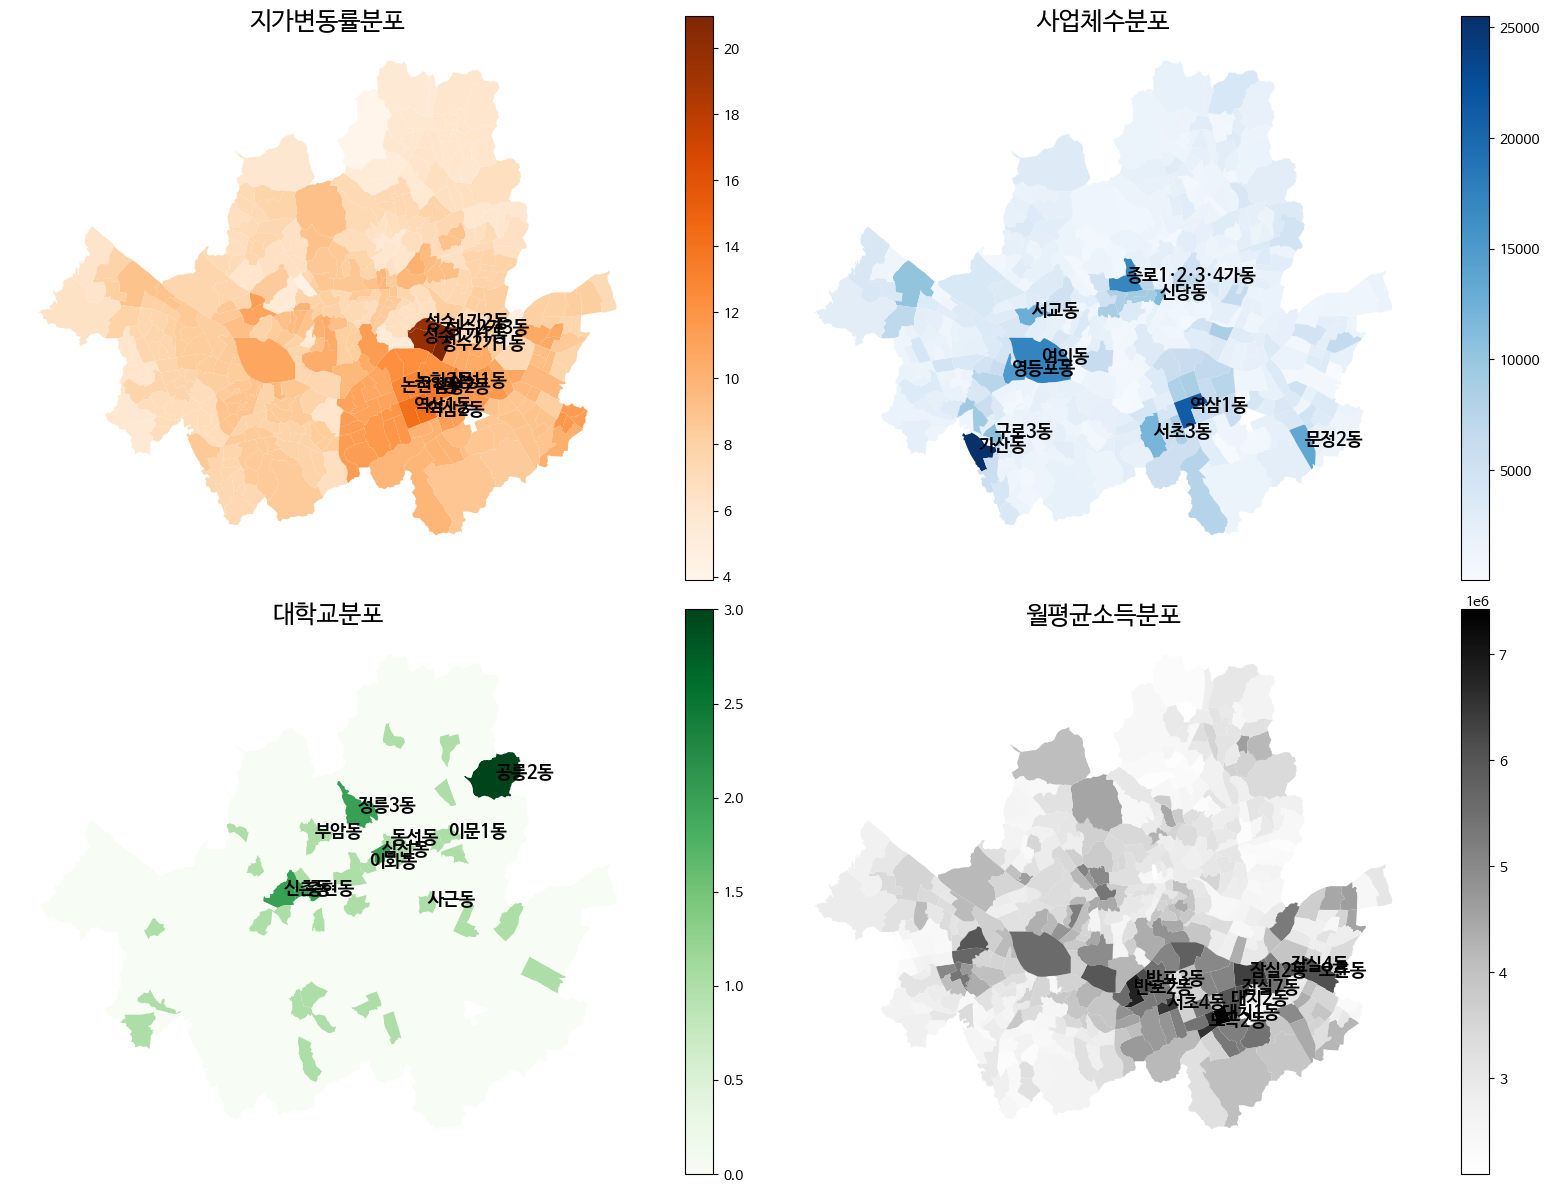

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

for i, var in enumerate(region_feature):
    row = i // 2
    col = i % 2

    # 그래프 그리기
    map_base_2024.plot(column= var, ax=axes[row, col], legend=True, cmap=four_color[i])
    axes[row, col].set_title(var + "분포", fontsize=18)
    axes[row, col].axis('off')

    # 상위 10개 지역 표시
    top_10 = map_base_2024.nlargest(10, var)
    for idx in range(len(top_10)):
        lat = top_10.geometry.centroid.x.iloc[idx]
        long = top_10.geometry.centroid.y.iloc[idx]
        axes[row, col].text(lat, long, top_10["ADM_NM"].iloc[idx], fontsize=13, color='black', fontweight='bold')

plt.tight_layout()

# 이미지 저장
plt.savefig(f'{final_img}/2024_지역특성지도.png', format='png')
plt.show()

In [30]:
map_var = ['지가변동률', '사업체수', '편의점']

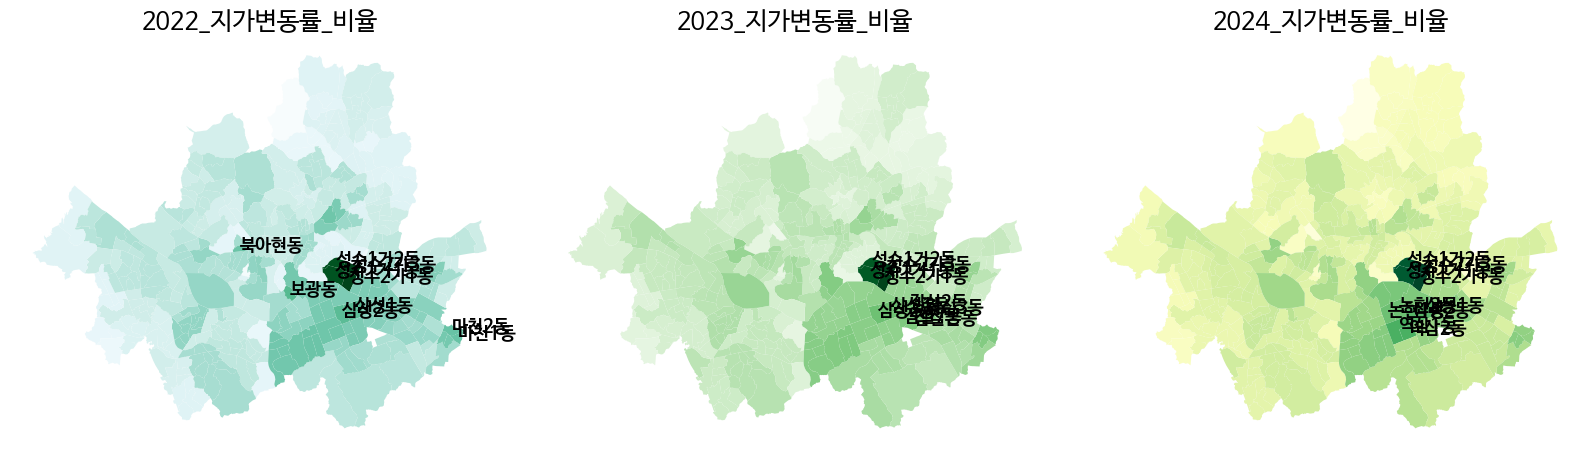

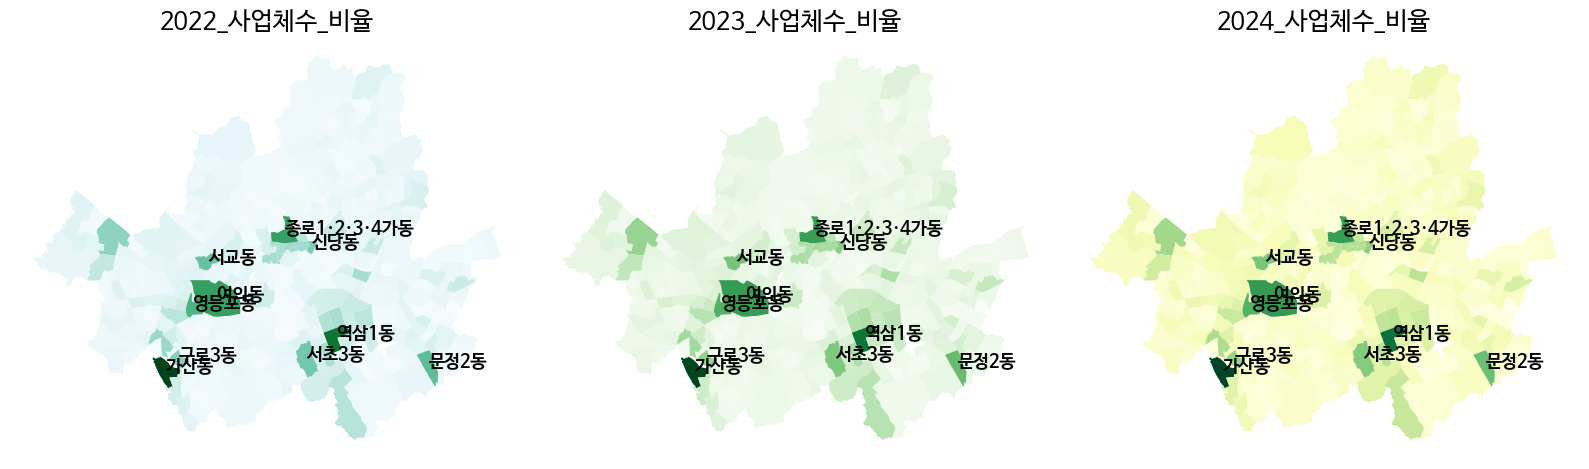

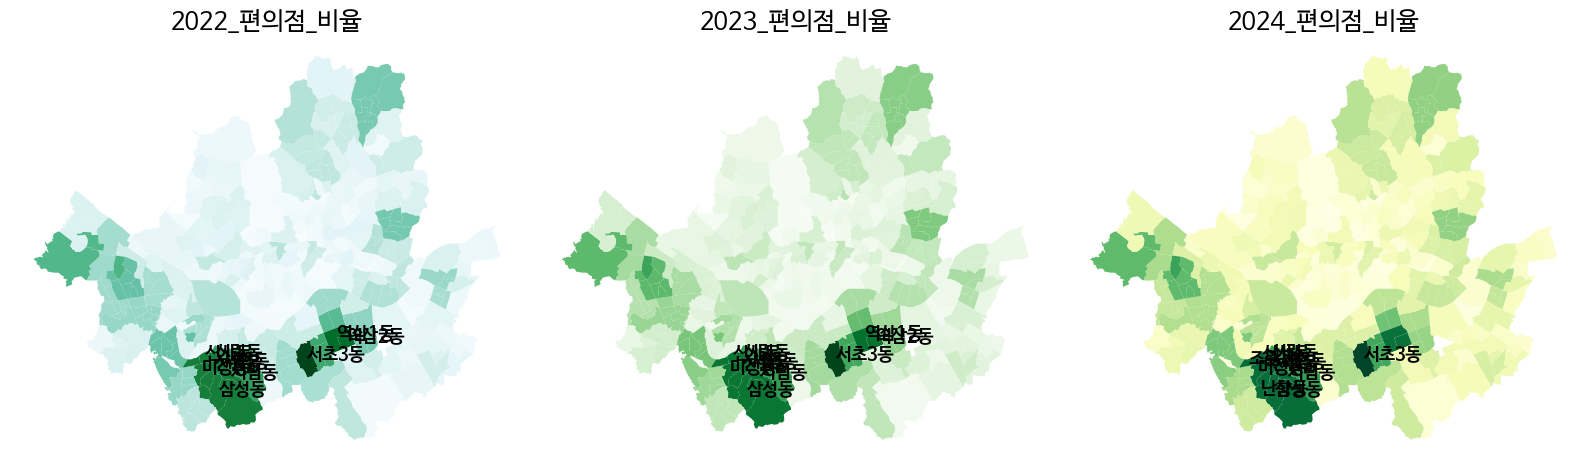

In [31]:
# 지역특성 그래프 그리기
# 년도별

for i_var, var in enumerate(map_var):

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

    for i_year, year in enumerate(year_list):
        map_base = globals()[f'map_base_{year}']

    # 그래프 그리기
        map_base.plot(column=var, ax=axes[i_year], cmap=cmap_year_list[i_year])
        axes[i_year].set_title(f'{year}_{var}_비율', fontsize=18)
        axes[i_year].axis('off')

        # 상위 10개 지역 표시
        top_10 = map_base.nlargest(10, var)
        for idx in range(len(top_10)):
            lat = top_10.geometry.centroid.x.iloc[idx]
            long = top_10.geometry.centroid.y.iloc[idx]
            axes[i_year].text(lat, long, top_10["ADM_NM"].iloc[idx], fontsize=13, color='black', fontweight='bold')

    plt.tight_layout()

    # 이미지 저장
    plt.savefig(f'{final_img}/{var}_년도별_지역특성.png', format='png')
plt.show()

# 1인가구 상위지역

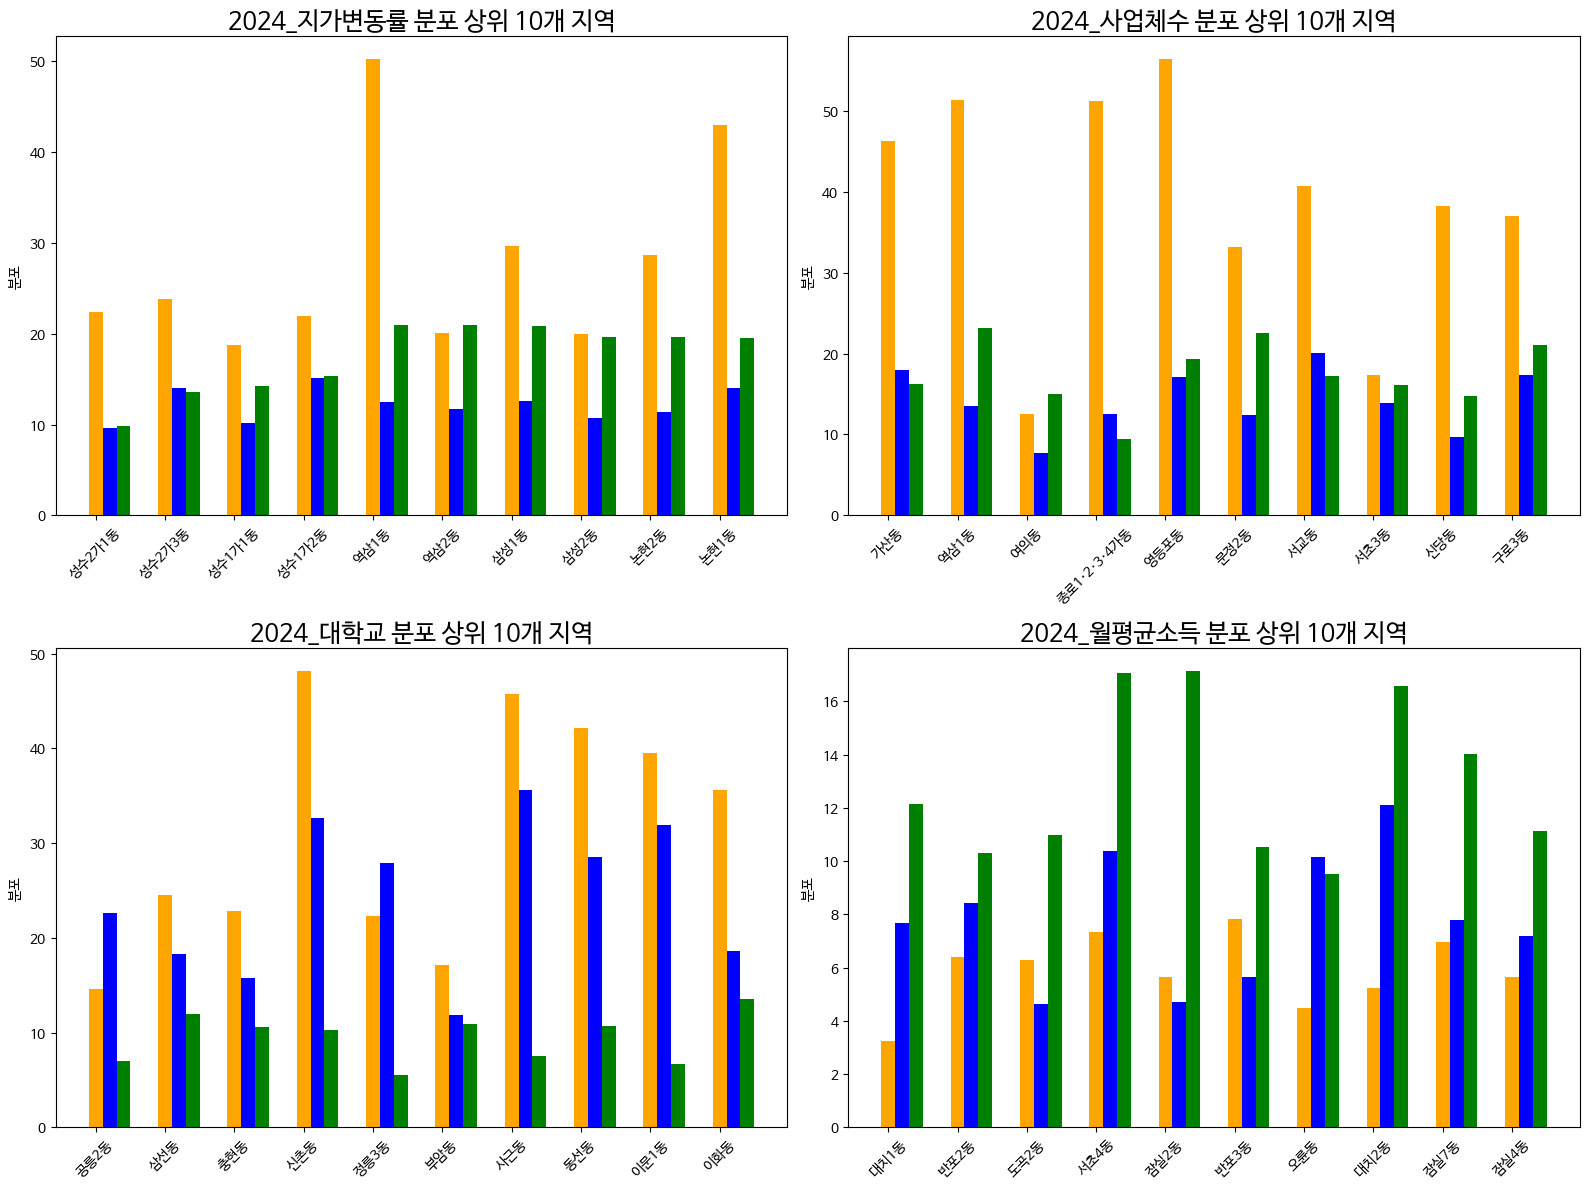

In [43]:
# 1지역특성 상위 10개동 그래프
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

for year in year_list:
    df = globals()[f'map_base_{year}']

    for i, var in enumerate(region_feature):
        row = i // 2
        col = i % 2
        data = df.nlargest(10, var)

        bar_width = 0.2
        index = np.arange(len(data['ADM_NM']))

        # axes[row, col].bar(index - bar_width, data['solo_all_ratio'], width=bar_width, color=color_list[0], label='전체 1인가구 비율')
        axes[row, col].bar(index, data['solo_all_ratio'], width=bar_width, color=color_list[0], label='전체 1인 가구 비율')
        axes[row, col].bar(index + bar_width, data['solo_20s_ratio'], width=bar_width, color=color_list[1], label='20대 1인 가구 비율')
        axes[row, col].bar(index + 2 * bar_width, data['solo_30s_ratio'], width=bar_width, color=color_list[2], label='30대 1인 가구 비율')

        axes[row, col].set_title(f"{year}_{var} 분포 상위 10개 지역", fontsize=18)
        axes[row, col].set_ylabel("분포")
        axes[row, col].set_xticks(index)
        axes[row, col].set_xticklabels(data['ADM_NM'], rotation=45)
        axes[row, col].legend()

    # plt.suptitle('1인가구 비율', fontsize=20)
    plt.tight_layout()
    plt.savefig(f'{final_img}/{year}_지역 특성.png', format='png')

plt.show()

In [33]:
data

BASE_DATE ADM_NM    ADM_CD  \
74   20230701   대치1동  11230600   
359  20230701   반포2동  11220580   
372  20230701   도곡2동  11230670   
334  20230701   서초4동  11220540   
199  20230701   잠실2동  11240790   
360  20230701   반포3동  11220590   
125  20230701    오륜동  11240590   
386  20230701   대치2동  11230790   
194  20230701   잠실7동  11240780   
183  20230701   잠실4동  11240750   

                                              geometry  total_all  solo_all  \
74   POLYGON ((961181.399 1944459.061, 961195.337 1...    15702.0     510.0   
359  POLYGON ((955939.986 1945136.286, 955955.333 1...    14556.0     929.0   
372  POLYGON ((960688.264 1943637.313, 960697.015 1...    26263.0    1648.0   
334  POLYGON ((958026.017 1944983.909, 958036.371 1...    22596.0    1634.0   
199  POLYGON ((963659.369 1947108.968, 963660.877 1...    25624.0    1451.0   
360  POLYGON ((956542.140 1946426.039, 956545.030 1...    16169.0    1267.0   
125  POLYGON ((968048.699 1946730.859, 968053.121 1...    14496.0     650.0   
386  POLYGON ((962183.968 1944609.707, 962183.933 1...    31516.0    1655.0   
194  POLYGON ((962746.203 1945849.361, 962764.399 1...     7985.0     557.0   
183  POLYGON ((965939.631 1946830.716, 965827.825 1...    22640.0    1275.0   

     total_20  solo_20  total_25  solo_25  ...   총매출금액_커피-음료  총매출금액_패스트푸드점  \
74     1171.0     36.0     806.0     27.0  ...  3.154412e+09  6.881389e+08   
359     822.0     64.0     807.0     72.0  ...  2.820239e+08  0.000000e+00   
372    1827.0     62.0    1823.0     68.0  ...  3.581236e+09  4.763348e+07   
334    1434.0    143.0    1446.0    161.0  ...  5.508323e+09  5.992186e+08   
199    1358.0     53.0    1367.0     63.0  ...  1.957601e+09  2.265353e+08   
360    1042.0     61.0     982.0     64.0  ...  5.095137e+08  3.087964e+07   
125    1648.0     88.0     999.0     44.0  ...  4.151766e+08  0.000000e+00   
386    3051.0    183.0    2398.0    161.0  ...  5.312048e+09  1.400652e+09   
194     575.0     42.0     469.0     39.0  ...  0.000000e+00  0.000000e+00   
183    1430.0     75.0    1836.0     97.0  ...  3.678124e+07  0.000000e+00   

        총매출금액_편의점   총매출금액_한식음식점  총매출금액_호프-간이주점  solo_20s  solo_30s  \
74   1.279862e+09  4.040514e+09   0.000000e+00      31.5      46.0   
359  1.557324e+09  6.196525e+08   0.000000e+00      68.0      80.5   
372  2.993438e+09  1.083592e+10   1.350182e+09      65.0     153.0   
334  7.047053e+09  2.441597e+10   1.036013e+10     152.0     226.0   
199  9.061328e+08  1.715033e+09   0.000000e+00      58.0     209.5   
360  5.396210e+08  5.530636e+09   0.000000e+00      62.5     110.5   
125  1.727652e+09  7.411374e+08   0.000000e+00      66.0      54.0   
386  8.075110e+09  2.067731e+10   2.933899e+09     172.0     228.5   
194  3.410978e+08  6.600000e+07   0.000000e+00      40.5      71.5   
183  2.819361e+09  1.482266e+08   0.000000e+00      86.0     135.0   

     solo_all_ratio  solo_20s_ratio  solo_30s_ratio  
74         3.247994        6.176471        9.019608  
359        6.382248        7.319699        8.665231  
372        6.274988        3.944175        9.283981  
334        7.231368        9.302326       13.831089  
199        5.662660        3.997243       14.438318  
360        7.835982        4.932912        8.721389  
125        4.483996       10.153846        8.307692  
386        5.251301       10.392749       13.806647  
194        6.975579        7.271095       12.836625  
183        5.631625        6.745098       10.588235  

[10 rows x 136 columns]

In [34]:
top_result = pd.DataFrame()
top10_result = pd.DataFrame()
top10_col = []

for year in year_list:
    df = globals()[f'df_{year}']

    for idx, depend in enumerate(ratio_list):
        temp = df.nlargest(10, depend)
        temp_sum = temp[reg_col].sum()
        temp_dong =pd.DataFrame(temp_sum)
        temp_dong.columns = [depend]

        if depend == 'solo_all_ratio':
            top_result = temp_dong
        else:
            top_result = pd.concat([top_result, temp_dong], axis = 1)

        globals()[f'top10_{depend}']= temp

        temp_sum = temp[reg_col].mean().round()

        temp_sum =pd.DataFrame(temp_sum)
        temp_sum.columns = [depend]

        if (year == year_list[0]) & (idx == 0):
            top10_result = temp_sum
        else:
            top10_result = pd.concat([top10_result, temp_sum], axis = 1)

        top10_col.append(f'{year}_{depend[5:8]}')

top10_result.columns = top10_col
top10_result

2022_all    2022_20s    2022_30s    2023_all    2023_20s  \
ADM_CD          11102641.0  11092670.0  11219607.0  11115644.0  11079676.0   
solo_all_ratio        53.0        43.0        33.0        54.0        42.0   
solo_20s_ratio        22.0        32.0        13.0        21.0        32.0   
solo_30s_ratio        12.0         9.0        21.0        13.0         8.0   
네일숍                   33.0        24.0        62.0        36.0        20.0   
미용실                  158.0       124.0       199.0       159.0        91.0   
애완동물                  30.0        18.0        56.0        34.0        14.0   
분식전문점                148.0        71.0       143.0       146.0        52.0   
한식음식점                660.0       310.0       806.0       698.0       233.0   
양식음식점                184.0        90.0       260.0       183.0        66.0   
일식음식점                 81.0        39.0       121.0        87.0        29.0   
중식음식점                 56.0        29.0        75.0        58.0        24.0   
치킨전문점                 22.0        17.0        25.0        20.0        15.0   
커피-음료                 22.0        15.0        15.0        22.0        12.0   
패스트푸드점                34.0        17.0        60.0        33.0        14.0   
제과점                   33.0        22.0        50.0        38.0        17.0   
호프-간이주점               34.0        27.0        15.0        35.0        20.0   
대형마트                   0.0         0.0         0.0         0.0         0.0   
쇼핑업체수                  2.0         1.0         1.0         3.0         1.0   
편의점                   66.0        35.0        88.0        73.0        27.0   
슈퍼마켓                   0.0         0.0         0.0         0.0         0.0   
지가변동률                  5.0         5.0         6.0         7.0         7.0   
지가                    97.0        98.0        95.0        99.0        99.0   
사업체수                7170.0      2388.0      9362.0      8535.0      2291.0   
종사자수               52307.0     13399.0     70676.0     55421.0     13080.0   
대학교                    1.0         1.0         0.0         0.0         1.0   
기타대학                   0.0         0.0         0.0         0.0         0.0   
월평균소득            3064086.0   3127183.0   3903644.0   3099369.0   3052867.0   

                  2023_30s    2024_all    2024_20s    2024_30s  
ADM_CD          11199617.0  11118637.0  11080681.0  11199615.0  
solo_all_ratio        35.0        52.0        42.0        33.0  
solo_20s_ratio        13.0        22.0        31.0        12.0  
solo_30s_ratio        21.0        13.0         9.0        20.0  
네일숍                   58.0        40.0        26.0        62.0  
미용실                  179.0       154.0       115.0       183.0  
애완동물                  51.0        34.0        19.0        56.0  
분식전문점                120.0       124.0        60.0       117.0  
한식음식점                697.0       652.0       296.0       709.0  
양식음식점                222.0       164.0        81.0       224.0  
일식음식점                107.0        83.0        41.0       117.0  
중식음식점                 67.0        61.0        31.0        71.0  
치킨전문점                 21.0        18.0        15.0        20.0  
커피-음료                 12.0        16.0        12.0        11.0  
패스트푸드점                47.0        28.0        15.0        43.0  
제과점                   47.0        33.0        20.0        45.0  
호프-간이주점               15.0        32.0        22.0        15.0  
대형마트                   0.0         0.0         0.0         0.0  
쇼핑업체수                  2.0         2.0         1.0         2.0  
편의점                   73.0        75.0        37.0        77.0  
슈퍼마켓                   1.0         0.0         0.0         1.0  
지가변동률                  9.0         8.0         7.0        11.0  
지가                    98.0       100.0       100.0       100.0  
사업체수                8456.0      8875.0      2228.0      9386.0  
종사자수               63781.0     59693.0     13006.0     71586.0  
대학교                    0.0         1.0         1.0         0.0  


In [35]:
top10_collist = top10_result.columns.tolist()

for select in year_list + depend_name:
    temp = top10_result[[column for column in top10_collist if select in column]]
    temp.to_excel(f'{final_table}/top10_{select}.xlsx')
    temp.to_csv(f'{final_table}/top10_{select}.csv')



# 변수간의 상관관계

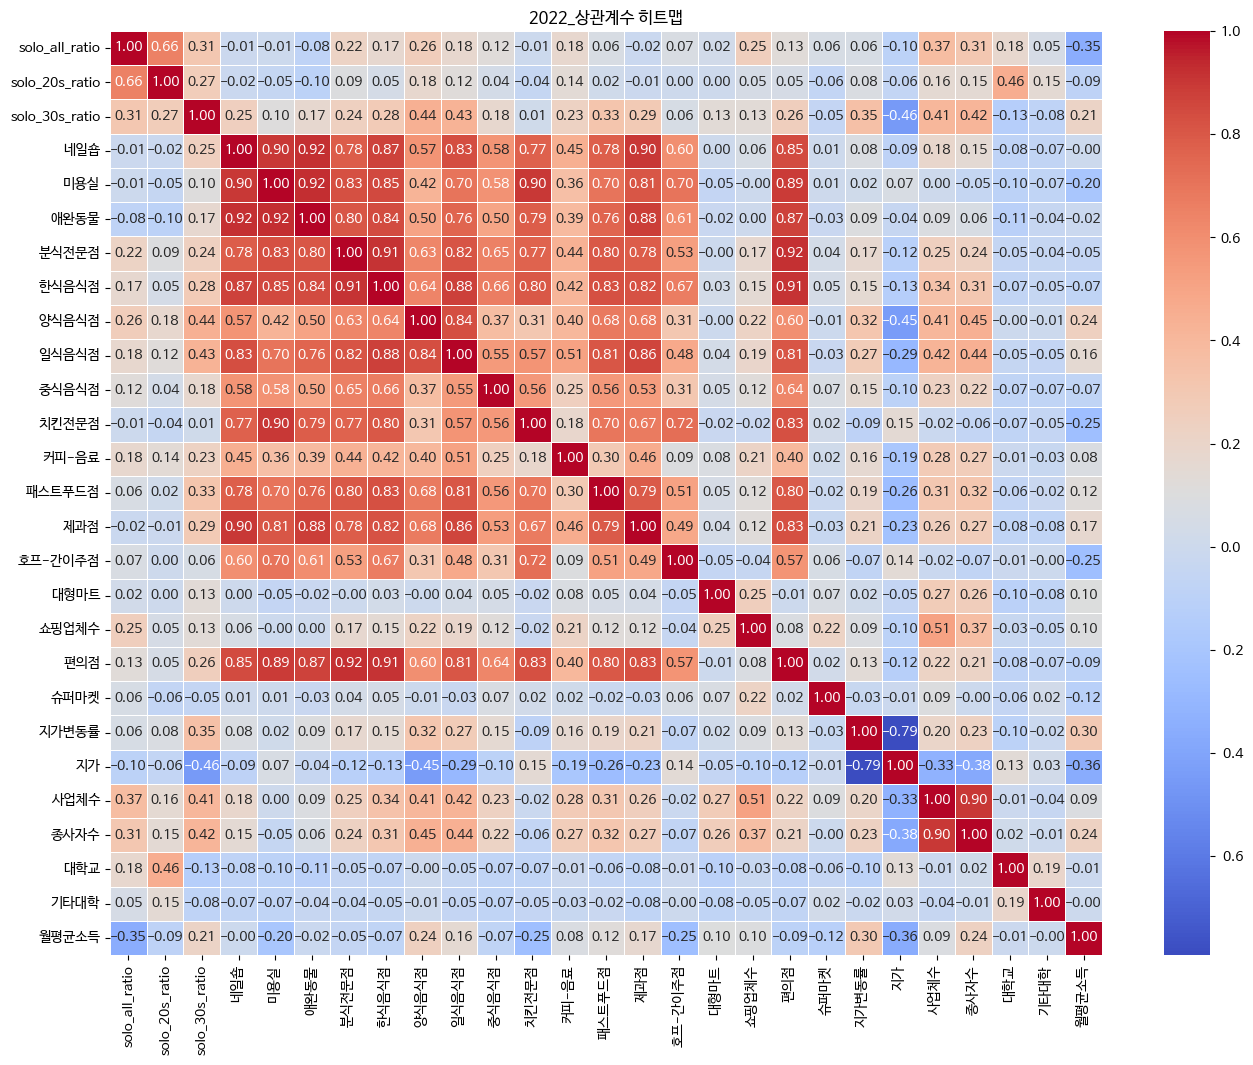

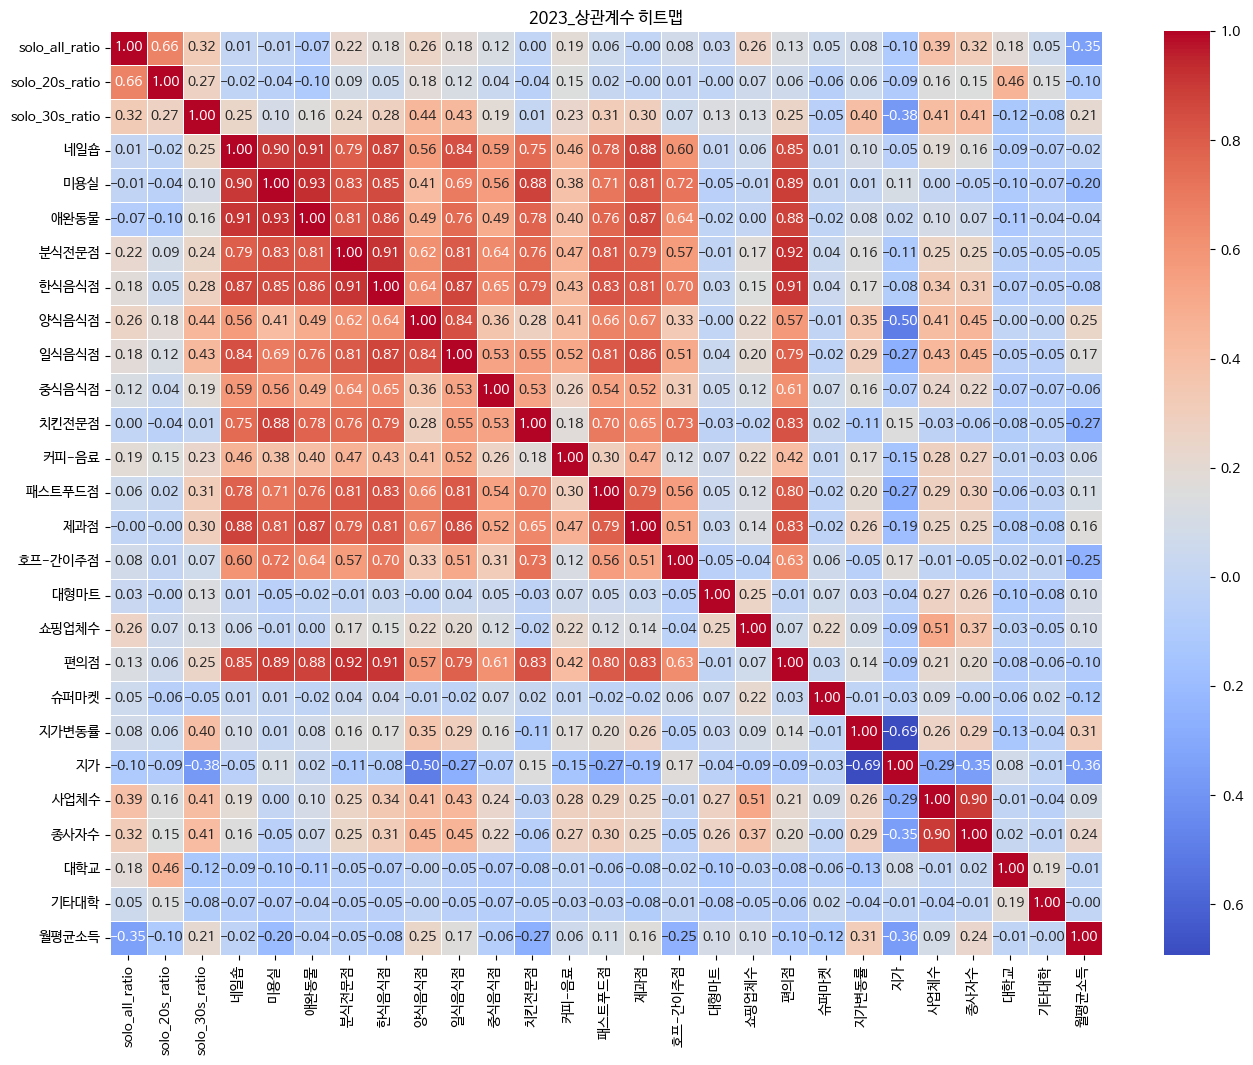

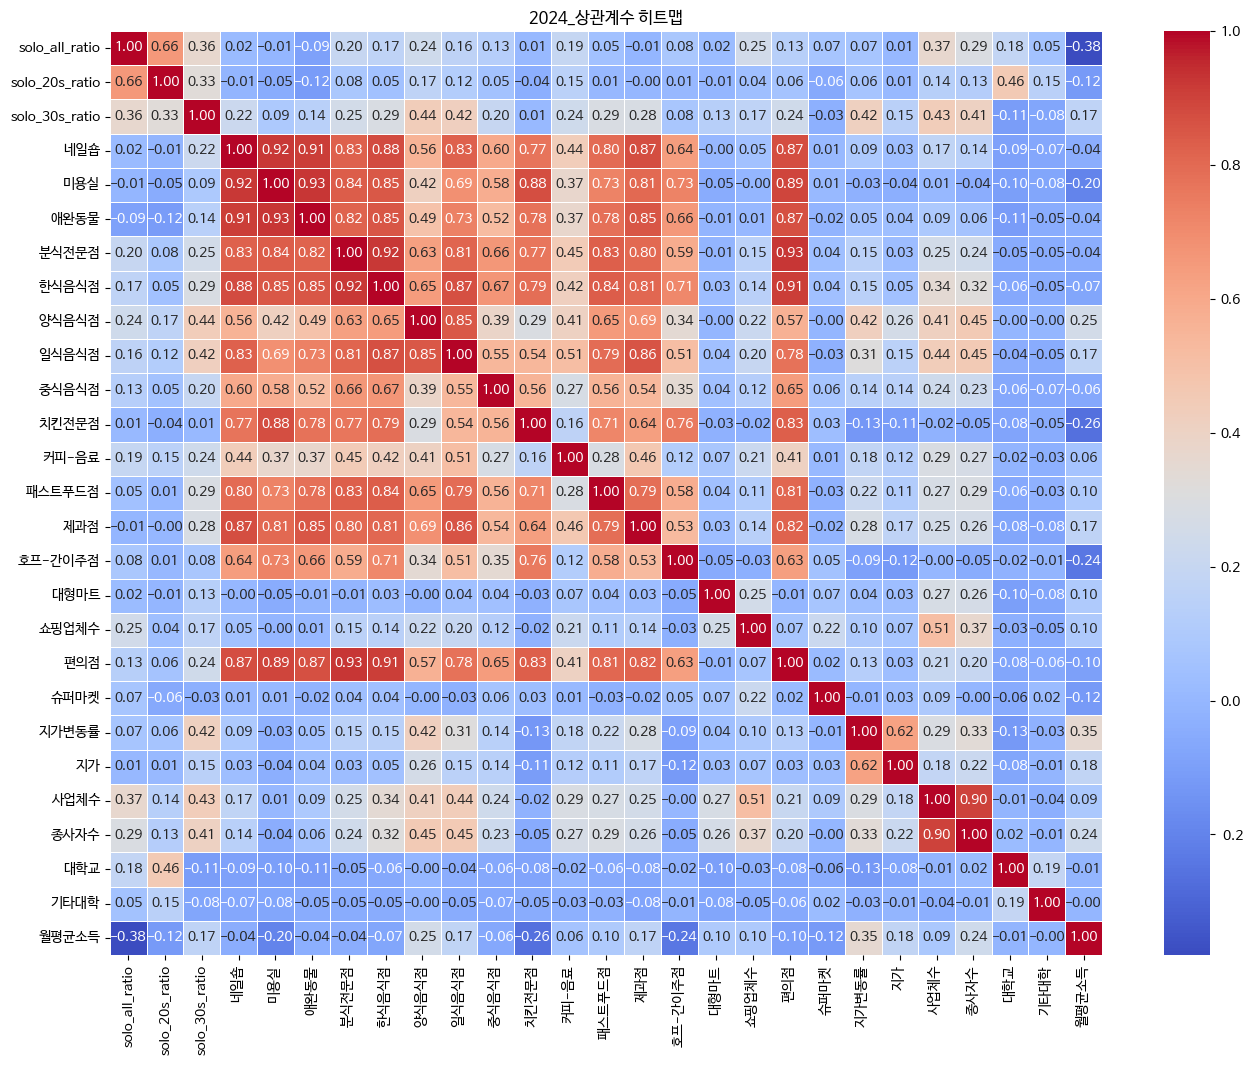

In [36]:
for year in year_list:
    temp = globals()[f'reg_{year}'].drop(columns = 'ADM_CD')
    temp_corr = temp.corr(numeric_only = True)

    # 히트맵 그리기
    plt.figure(figsize=(16, 12))
    sns.heatmap(temp_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f"{year}_상관계수 히트맵")
    plt.savefig(f'{final_img}/{year}_상관관계.png', format='png')
    plt.show()
